In [32]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import time
import pickle
import torch
import gpytorch
from collections import defaultdict
from IPython.display import HTML

# Allow imports from the parent directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from main import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
pre_file_path = 'datas/datas_pre.pkl'
with open(pre_file_path, 'rb') as f:
    datas_pre = pickle.load(f)

In [34]:
len(datas_pre)

2

In [35]:
data = datas_pre[1]
data.T

tensor([  157.6632,  3757.9675,  7357.6758, 10957.9639, 14558.0088])

In [36]:
data.T

tensor([  157.6632,  3757.9675,  7357.6758, 10957.9639, 14558.0088])

In [37]:
data.date

'2024-06-21'

In [41]:
fit_file_path = 'datas/datas_fit.pkl'

with open(fit_file_path, 'rb') as f:
    datas_fit = pickle.load(f)
    
data1 =  datas_fit[0]
data2 =  datas_fit[1]

In [55]:
#f = data2.plot_vel_data(frame = 4, scale = 3e-4)

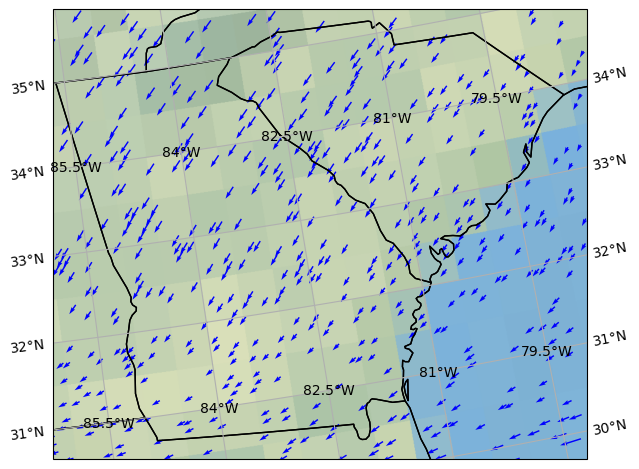

In [57]:
f = data1.plot_vel(indices, frame=8, color="blue", scale = 3e-4, gif = False)


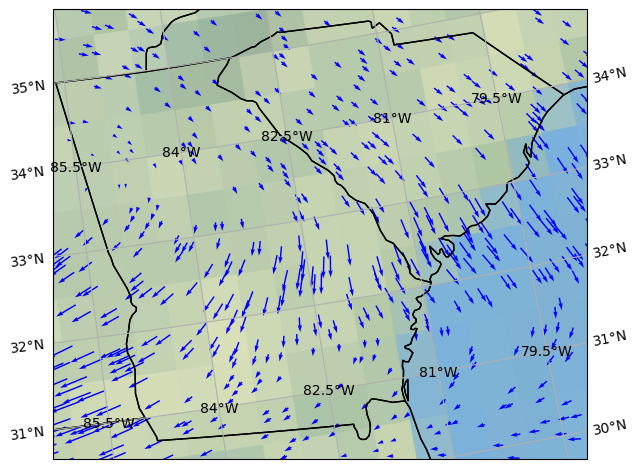

In [48]:
indices = torch.randperm(data.m)[:500]
f = data2.plot_vel(indices, frame=4, color="blue", scale = 3e-4, gif = False)


In [52]:
data2.T[2]

tensor(7357.6758)

In [56]:
data1.T

tensor([  157.6632,  1057.3679,  1957.9626,  2857.9771,  3757.9675,  4657.9521,
         5557.3804,  6457.9629,  7357.6758,  8257.9785,  9157.9570, 10057.9668,
        10957.9639, 11857.9941, 12757.3955, 13657.3975, 14558.0088])

In [54]:
tools.rmse_datas(data1, data2,data2.T[2] )

tensor(8.3013)

In [4]:
date = '2024-10-16'
hours = 4
start = "00:00"
end = str(hours).zfill(2) + ":00"
time_list = tools.generate_time_ranges(date, minutes=30, start_time=start, end_time=end)
total_times = len(time_list)

In [5]:
from goes2go import goes_nearesttime
from datetime import timedelta 
import xarray

In [6]:
ds = goes_nearesttime(
            time_list[0],
            satellite="noaa-goes16",
            product="ABI-L2-MCMIP",
            domain="C",
            return_as="xarray"
        )

📦 Finished downloading [1] files to [/home/yf297/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [58]:
ds.CMI_C08

<xarray.DataArray 'CMI_C08' (y: 1500, x: 2500)> Size: 15MB
array([[      nan,       nan,       nan, ..., 228.12671, 228.0422 ,
        227.9577 ],
       [      nan,       nan,       nan, ..., 227.5352 , 227.45071,
        227.6197 ],
       [      nan,       nan,       nan, ..., 226.7747 , 226.8592 ,
        227.0282 ],
       ...,
       [245.95615, 246.4209 , 246.25189, ..., 239.61865, 239.61865,
        239.49191],
       [246.4209 , 246.50539, 246.4209 , ..., 239.49191, 239.49191,
        239.61865],
       [246.50539, 246.46313, 246.37863, ..., 239.40741, 239.44966,
        239.61865]], shape=(1500, 2500), dtype=float32)
Coordinates:
    t                    datetime64[ns] 8B 2024-10-16T00:02:36.329713024
  * y                    (y) float32 6kB 0.1282 0.1282 ... 0.04432 0.04427
  * x                    (x) float32 10kB -0.1013 -0.1013 ... 0.03856 0.03861
    y_image              float32 4B 0.08624
    x_image              float32 4B -0.03136
    dataset_name         <U74 296B 'OR_ABI-L2-MCMIPC-M6_G16_s20242900001170_e...
    date_created         <U22 88B '2024-10-16T00:04:06.5Z'
    time_coverage_start  <U22 88B '2024-10-16T00:01:17.0Z'
    time_coverage_end    <U22 88B '2024-10-16T00:03:55.5Z'
Attributes:
    long_name:              ABI Cloud and Moisture Imagery brightness tempera...
    standard_name:          toa_brightness_temperature
    sensor_band_bit_depth:  12
    valid_range:            [   0 4095]
    units:                  K
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF_C08